In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
df = pd.read_csv('AAPL.csv')
# Use the 'Close' price for prediction
data = df[['Close']].values

In [ ]:
print(df)

             Date        Open        High         Low       Close   Adj Close  \
0      1980-12-12    0.128348    0.128906    0.128348    0.128348    0.100323   
1      1980-12-15    0.122210    0.122210    0.121652    0.121652    0.095089   
2      1980-12-16    0.113281    0.113281    0.112723    0.112723    0.088110   
3      1980-12-17    0.115513    0.116071    0.115513    0.115513    0.090291   
4      1980-12-18    0.118862    0.119420    0.118862    0.118862    0.092908   
...           ...         ...         ...         ...         ...         ...   
10404  2022-03-18  160.509995  164.479996  159.759995  163.979996  163.979996   
10405  2022-03-21  163.509995  166.350006  163.009995  165.380005  165.380005   
10406  2022-03-22  165.509995  169.419998  164.910004  168.820007  168.820007   
10407  2022-03-23  167.990005  172.639999  167.649994  170.210007  170.210007   
10408  2022-03-24  171.059998  174.139999  170.210007  174.070007  174.070007   

          Volume  
0      4

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split data into training and testing sets
train_size = int(len(scaled_data) * 0.80)
train_data = scaled_data[:train_size, :]
test_data = scaled_data[train_size:, :]

#  Create sequences for LSTM training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)


In [ ]:
seq_length = 10
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Build an LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions on test data
predictions = model.predict(X_test)

Epoch 1/100
260/260 [==============================] - 7s 15ms/step - loss: 2.8421e-05
Epoch 2/100
260/260 [==============================] - 2s 7ms/step - loss: 1.9984e-06
Epoch 3/100
260/260 [==============================] - 2s 7ms/step - loss: 1.6849e-06
Epoch 4/100
260/260 [==============================] - 2s 7ms/step - loss: 1.7902e-06
Epoch 5/100
260/260 [==============================] - 2s 7ms/step - loss: 1.6478e-06
Epoch 6/100
260/260 [==============================] - 2s 8ms/step - loss: 1.4394e-06
Epoch 7/100
260/260 [==============================] - 2s 9ms/step - loss: 1.4538e-06
Epoch 8/100
260/260 [==============================] - 2s 7ms/step - loss: 1.3733e-06
Epoch 9/100
260/260 [==============================] - 2s 7ms/step - loss: 1.3731e-06
Epoch 10/100
260/260 [==============================] - 2s 7ms/step - loss: 1.2242e-06
Epoch 11/100
260/260 [==============================] - 2s 7ms/step - loss: 1.2425e-06
Epoch 12/100
260/260 [=============================

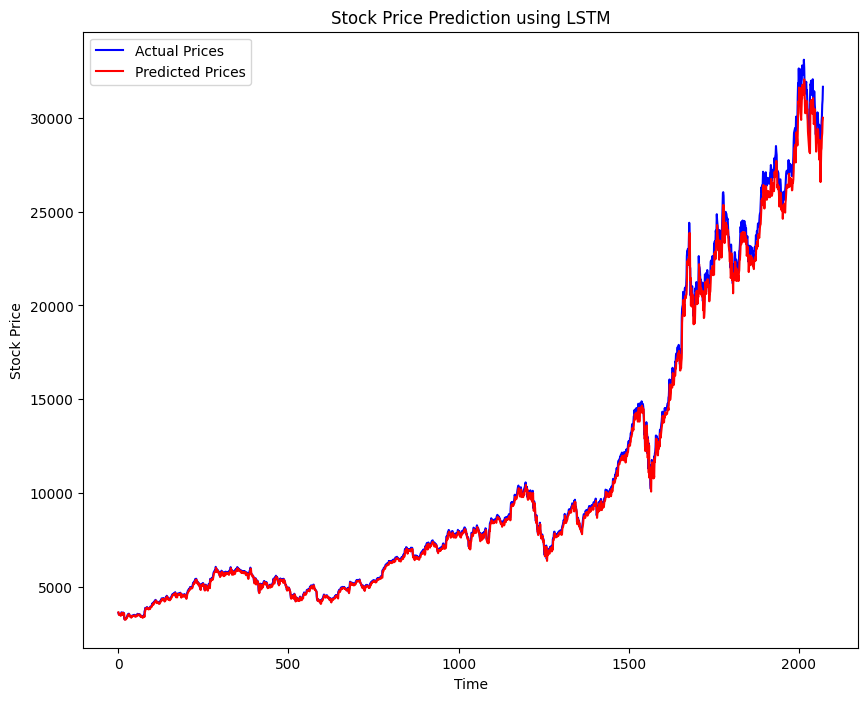

In [ ]:
# Inverse transform predictions to original scale
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Plot the results
plt.figure(figsize=(6,10))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction using LSTM')
plt.legend()
plt.show()